## Importing Necessary Library

In [1]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading

In [4]:
df=pd.read_csv("titanic_dataset.csv")
#https://drive.google.com/file/d/1plN-KWVopblsqOdgTYPn-O-zG5cWrkf7/view?usp=drive_link

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# SibSp --> Siblings + Spouse
# Parch --> Parent + Child
# Embarked --> Boarding Station

In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing Value Check

In [9]:
# Percentage of missing values
# Identification of Missing values
100*df.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
# Taking care of missing values
# Any column having high %  (generally >40%) of missing values ideally should not be considered the part of analysis
# even if it is very relevent column for usecase bcoz the insights coming out from that column might not be reliable.

In [11]:
## Cabin column has more than 40% of missing values so straight away dropping it
df1=df.drop("Cabin",axis=1)
# axis =1 as we are dropping the column (axis=0 if you want to drop row)

In [12]:
100*df1.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [15]:
med=df1["Age"].median()
df1["Age"]=df1["Age"].fillna(med)
# Imputing or replacing missing values of age column with median of age column (Numerical Data)

In [16]:
100*df1.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [17]:
df2=df1[df1["Embarked"].notna()]
# exluding rows where embarked values is missing

In [18]:
100*df2.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [19]:
df2.shape

(889, 11)

# Univariate Analysis

#### Categorical

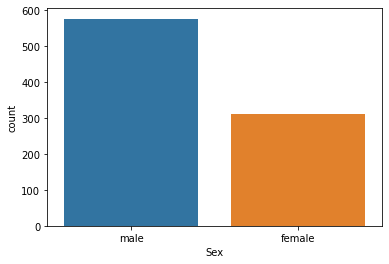

In [20]:
sns.countplot(x=df2["Sex"])
plt.show()

#### Numerical

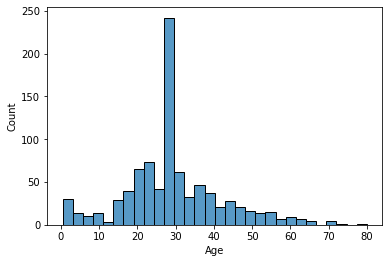

In [22]:
sns.histplot(x=df2["Age"])
plt.show()

In [24]:
df2["Age"].describe()

count    889.000000
mean      29.315152
std       12.984932
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

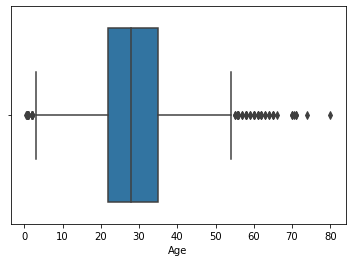

In [28]:
sns.boxplot(x=df2["Age"])
plt.show()
#blackdots --> outliers
# Upper Whisker: Q3+1.5*(Q3-Q1)
# Lower Whisker: Q1-1.5*(Q3-Q1)

## Bivariate Analysis

#### Numerical Vs Numerical

In [29]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


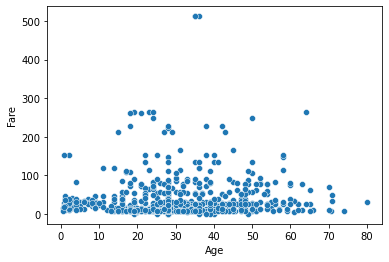

In [31]:
sns.scatterplot(x=df2["Age"],y=df2["Fare"])
plt.show()

#### Numerical Vs Categorical

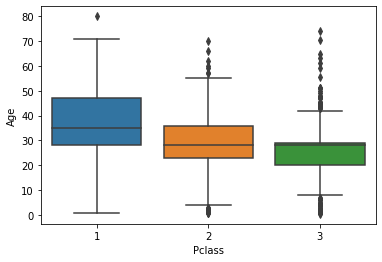

In [34]:
sns.boxplot(x=df2["Pclass"],y=df2["Age"])
plt.show()

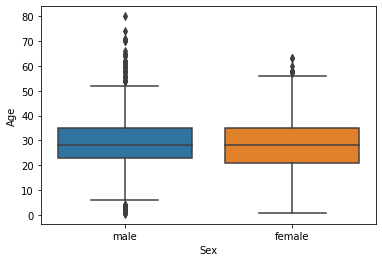

In [35]:
sns.boxplot(x=df2["Sex"],y=df2["Age"])
plt.show()

## Multivariate Analysis

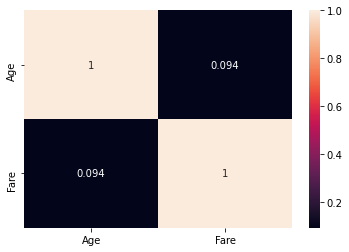

In [39]:
sns.heatmap(df2[["Age","Fare"]].corr(),annot=True)
plt.show()

In [ ]:
## Correlation represents strength of relationship between variables
## Correlation lies in the range of -1 to 1
## Negative correlation  (0 to -1) shows inverse relationship
## Positive correlation (0 to 1) shows direct relationship
## 0 or near by correlation represents no relationship.